In [210]:
import pandas as pd 
import numpy as np
import joblib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [188]:
df_train = pd.read_csv(r'C:\Users\pc\Documents\MACHINE LEARNING\Codveda-Internship\Logistic Regression\datasets\Churn train set.csv')
df_train.head()

,ohe__International plan_No,ohe__International plan_Yes,ohe__Voice mail plan_No,ohe__Voice mail plan_Yes,ohe__Region_Midwest,ohe__Region_Northeast,ohe__Region_South,ohe__Region_West,scd__Account length,scd__Number vmail messages,scd__Total day minutes,scd__Total day calls,scd__Total eve minutes,scd__Total eve calls,scd__Total night minutes,scd__Total night calls,scd__Total intl minutes,scd__Total intl calls,scd__Customer service calls,remainder__Churn
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.837756,1.983109,-0.104002,-0.629192,-0.254049,-1.902520,-1.194073,-0.276436,0.086097,-0.633742,0.296605,0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.069707,1.763891,-0.273625,1.187956,0.279870,-0.420542,-0.512699,-0.678318,1.349113,1.381678,1.795091,0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.020594,-0.574437,1.770782,1.235775,-0.467616,-1.161531,-0.958365,-1.130436,1.735035,0.575510,2.544334,0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.438050,-0.574437,-0.841417,0.518480,-0.151294,0.161663,-0.780099,1.984154,0.086097,-1.036826,0.296605,0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.585388,-0.574437,1.045866,0.279382,-1.485085,1.061435,1.008508,0.527330,0.366767,0.172426,-0.452638,0


Model Development

In [189]:
x = df_train.drop('remainder__Churn', axis=1)
y = df_train['remainder__Churn']

In [190]:
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [191]:
lr_pipe = Pipeline([
    ('lr', LogisticRegression())
])

In [192]:
lr_pipe.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('lr', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpe

In [193]:
y_lr_pred = lr_pipe.predict(x_validate) 

In [194]:
lr_ac_validate = accuracy_score(y_validate, y_lr_pred)
print("Accuracy Score:", lr_ac_validate)

Accuracy Score: 0.8878504672897196


In [195]:
CR = classification_report(y_validate, y_lr_pred, output_dict=True)
CR = pd.DataFrame(CR)
CR

,0,1,accuracy,macro avg,weighted avg
precision,0.908163,0.666667,0.88785,0.787415,0.874309
recall,0.967391,0.400000,0.88785,0.683696,0.887850
f1-score,0.936842,0.500000,0.88785,0.718421,0.875603
support,92.000000,15.000000,0.88785,107.000000,107.000000


HyperParameter Tuning

In [196]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

lr = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)
lr.fit(x_train_smote, y_train_smote)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [197]:
lr_val = lr.predict(x_test) 

In [198]:
ac_val = accuracy_score(y_test, lr_val)
print("Accuracy Score:", ac_val)

Accuracy Score: 0.8208955223880597


In [199]:
CR_val = classification_report(y_test, lr_val, output_dict=True)
CR_val = pd.DataFrame(CR_val)
CR_val

,0,1,accuracy,macro avg,weighted avg
precision,0.941748,0.419355,0.820896,0.680551,0.867677
recall,0.843478,0.684211,0.820896,0.763844,0.820896
f1-score,0.889908,0.520000,0.820896,0.704954,0.837459
support,115.000000,19.000000,0.820896,134.000000,134.000000


Loading Test Set 

In [200]:
df_test = pd.read_csv(r'C:\Users\pc\Documents\MACHINE LEARNING\Codveda-Internship\Logistic Regression\datasets\Churn test set.csv')
df_test.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn,Region
0,155,Yes,No,0,250.8,146,152.5,105,148.1,104,10.0,5,2,False,Midwest
1,81,No,No,0,324.7,48,236.4,82,187.6,78,13.1,5,0,True,West
2,48,No,Yes,27,141.1,109,224.7,94,174.3,122,13.2,2,1,False,West
3,67,No,Yes,41,174.7,86,160.6,93,155.3,108,13.4,1,0,False,Midwest
4,51,No,No,0,229.7,129,336.0,104,192.8,128,9.6,1,1,True,Midwest


In [201]:
ecd = LabelEncoder()
df_test['Churn'] = ecd.fit_transform(df_test['Churn'])

In [202]:
preprocessor = joblib.load(r'C:\Users\pc\Documents\MACHINE LEARNING\Codveda-Internship\Logistic Regression\datasets\preprocessor.pkl')

In [203]:
test_clean = preprocessor.transform(df_test)

In [204]:
test_clean.head()

,ohe__International plan_No,ohe__International plan_Yes,ohe__Voice mail plan_No,ohe__Voice mail plan_Yes,ohe__Region_Midwest,ohe__Region_Northeast,ohe__Region_South,ohe__Region_West,scd__Account length,scd__Number vmail messages,scd__Total day minutes,scd__Total day calls,scd__Total eve minutes,scd__Total eve calls,scd__Total night minutes,scd__Total night calls,scd__Total intl minutes,scd__Total intl calls,scd__Customer service calls,remainder__Churn
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.272963,-0.574437,1.242272,2.144349,-1.009595,0.214591,-1.007884,0.225918,-0.089322,0.172426,0.296605,0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.544200,-0.574437,2.561762,-2.541979,0.680814,-1.002748,-0.225492,-1.080201,0.998275,0.172426,-1.201882,1
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.354556,1.398527,-0.716431,0.375021,0.445083,-0.367615,-0.488930,1.130153,1.033359,-1.036826,-0.452638,0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.887987,2.421546,-0.116500,-0.724832,-0.846397,-0.420542,-0.865271,0.426859,1.103527,-1.439910,-1.201882,0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.280887,-0.574437,0.865529,1.331415,2.687544,0.161663,-0.122494,1.431565,-0.229657,-1.439910,-0.452638,1


Model Evaluation on Test Set

In [205]:
x_test = test_clean.drop('remainder__Churn', axis=1)
y_test = test_clean['remainder__Churn']

In [206]:
y_lr_test = lr.predict(x_test) 

In [207]:
lr_ac_test = accuracy_score(y_test, y_lr_test)
print("Accuracy Score:", lr_ac_test)

Accuracy Score: 0.8208955223880597


In [ ]:
y_probs = lr_pipe.predict_proba(x_validate)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validate, y_probs)

In [220]:
roc_auc = auc(fpr, tpr)
print("ROC Score:", roc_auc)

ROC Score: 0.8304347826086956


In [208]:
CR_lr_test = classification_report(y_test, y_lr_test, output_dict=True)
CR_lr_test = pd.DataFrame(CR_lr_test)
CR_lr_test

,0,1,accuracy,macro avg,weighted avg
precision,0.941748,0.419355,0.820896,0.680551,0.867677
recall,0.843478,0.684211,0.820896,0.763844,0.820896
f1-score,0.889908,0.520000,0.820896,0.704954,0.837459
support,115.000000,19.000000,0.820896,134.000000,134.000000


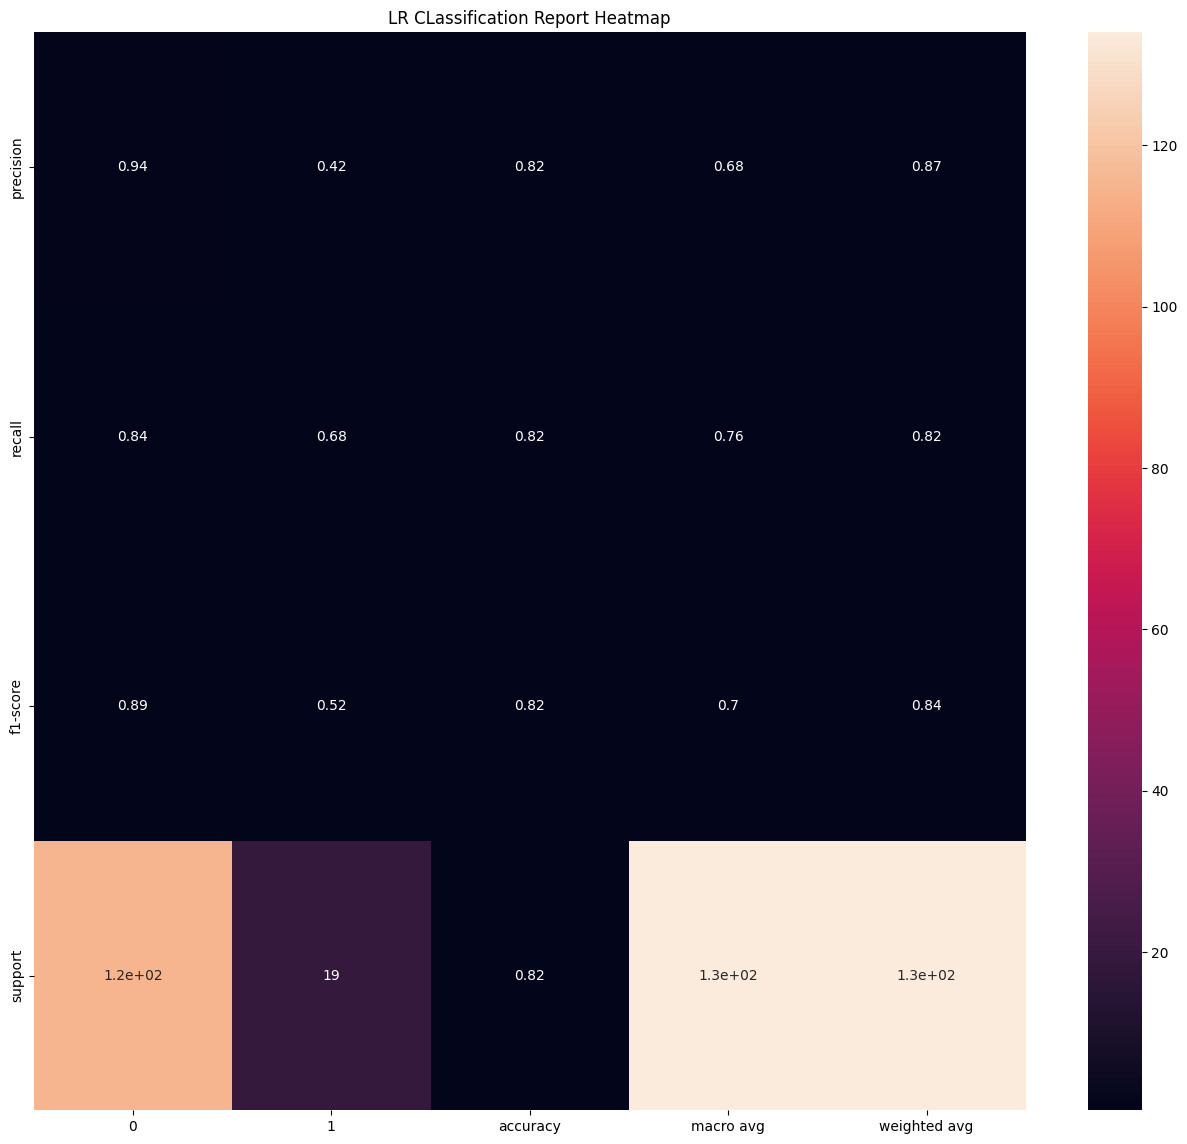

In [209]:
plt.figure(figsize=(16,14))
sns.heatmap(data=CR_lr_test, annot=True)
plt.title('LR CLassification Report Heatmap')
plt.show()

In [221]:
joblib.dump(lr, 'best churn model.pkl')

['best churn model.pkl']